In [1]:
import numpy as np
from scipy.stats import bernoulli
import matplotlib.pyplot as plt
import numpy.linalg as LA
from local_SE import *

In [7]:
# Uniform latent positions

n = 1000
omega=1

# Z = sorted(np.random.uniform(0, 10, n))
Z = np.linspace(0, 10, n)

A = np.zeros((n,n))
P = np.zeros((n,n))
for i in range(n):
    for j in range(i+1):
        P[i,j] = RBF(Z[i],Z[j], omega)
        A[i,j] = bernoulli.rvs(P[i,j])
        P[j,i] = P[i,j]
        A[j,i] = A[i,j]

In [4]:
def local_procrustes(PSE, LPSE, z):
    k=30
    M = PSE[z-k:z+k, :].T @ LPSE[z-k:z+k, :]
    U, S, Vt = LA.svd(M)
    R = U @ Vt
    return LPSE @ R.T

In [8]:
taus= [0.02, 0.05, 0.1, 1]

### can change the local point to focus on ####
# z1=750
z1 = 150


PSE = SE(P, 2)

LPSE_1_z1 = local_embedding(P, 2, weighting(Z, z1, taus[0]))
LPSE_1_z1 = local_procrustes(PSE, LPSE_1_z1, z1) * LA.norm(PSE[z1]) / LA.norm(LPSE_1_z1[z1])

LPSE_2_z1 = local_embedding(P, 2, weighting(Z, z1, taus[1]))
LPSE_2_z1 = local_procrustes(PSE, LPSE_2_z1, z1) * LA.norm(PSE[z1]) / LA.norm(LPSE_2_z1[z1])

LPSE_3_z1 = local_embedding(P, 2, weighting(Z, z1, taus[2]))
LPSE_3_z1 = local_procrustes(PSE, LPSE_3_z1, z1) * LA.norm(PSE[z1]) / LA.norm(LPSE_3_z1[z1])

LPSE_4_z1 = local_embedding(P, 2, weighting(Z, z1, taus[3]))
LPSE_4_z1 = local_procrustes(PSE, LPSE_4_z1, z1) * LA.norm(PSE[z1]) / LA.norm(LPSE_4_z1[z1])

ASE = SE(A, 2)
ASE = local_procrustes(PSE, ASE, z1) 

LASE_1 = local_embedding(A, 2, weighting(Z, z1, taus[0]))
LASE_1 = local_procrustes(LPSE_1_z1, LASE_1, z1) * LA.norm(LPSE_1_z1[z1]) / LA.norm(LASE_1[z1])

LASE_2 = local_embedding(A, 2, weighting(Z, z1, taus[1]))
LASE_2 = local_procrustes(LPSE_2_z1, LASE_2, z1) * LA.norm(LPSE_2_z1[z1]) / LA.norm(LASE_2[z1])

LASE_3 = local_embedding(A, 2, weighting(Z, z1, taus[2]))
LASE_3 = local_procrustes(LPSE_3_z1, LASE_3, z1) * LA.norm(LPSE_3_z1[z1]) / LA.norm(LASE_3[z1])

LASE_4 = local_embedding(A, 2, weighting(Z, z1, taus[3]))
LASE_4 = local_procrustes(LPSE_4_z1, LASE_4, z1) * LA.norm(LPSE_4_z1[z1]) / LA.norm(LASE_4[z1])



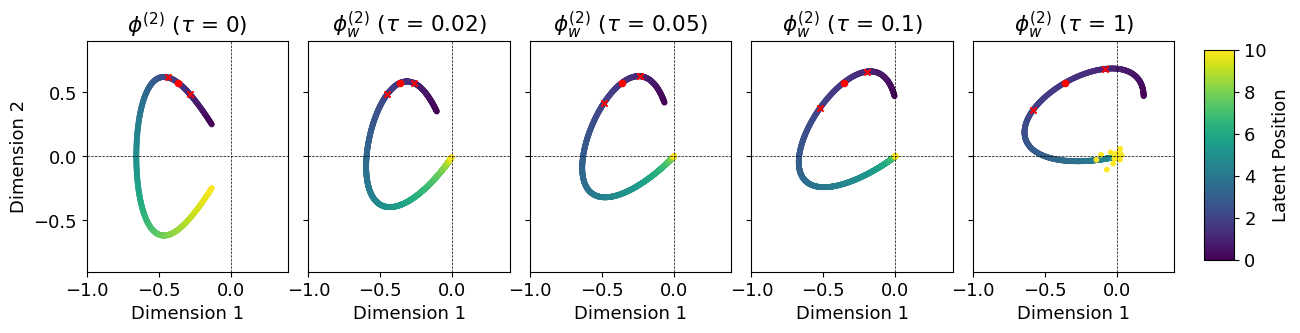

In [9]:
import matplotlib as mpl

# Set the font size globally
mpl.rcParams.update({'font.size': 13})

%matplotlib inline
fig, axs = plt.subplots(1, 5, figsize=(15, 3), sharex=True, sharey=True)

# Define axis limits
x_lim = (-1, 0.4)
y_lim = (-0.9, 0.9)

# Plot ASE
ax = axs[0]
ax.scatter(PSE[:, 0], PSE[:, 1], c=Z, alpha=0.5, cmap='viridis', s=10)
ax.scatter(PSE[z1, 0], PSE[z1, 1], c='r', s=20)
ax.scatter(PSE[z1-50, 0], PSE[z1-50, 1], c='r', marker='x', s=20)
ax.scatter(PSE[z1+50, 0], PSE[z1+50, 1], c='r', marker='x', s=20)
ax.set_xlabel('Dimension 1')
ax.set_ylabel('Dimension 2')
ax.set_title(r'$\phi^{(2)}$ ($\tau$ = 0)')
ax.set_xlim(x_lim)
ax.set_ylim(y_lim)
ax.axhline(0, color='black', linewidth=0.5, linestyle='--')
ax.axvline(0, color='black', linewidth=0.5, linestyle='--')

# Plot LASE_1_z1
ax = axs[1]
ax.scatter(LPSE_1_z1[:, 0], LPSE_1_z1[:, 1], c=Z, cmap='viridis', s=10)
ax.scatter(LPSE_1_z1[z1, 0], LPSE_1_z1[z1, 1], c='r', s=20)
ax.scatter(LPSE_1_z1[z1-50, 0], LPSE_1_z1[z1-50, 1], c='r', marker='x', s=20)
ax.scatter(LPSE_1_z1[z1+50, 0], LPSE_1_z1[z1+50, 1], c='r', marker='x', s=20)
ax.set_xlabel('Dimension 1')
ax.set_title(r'$\phi_w^{{(2)}}$ ($\tau$ = {})'.format(taus[0]))
ax.set_xlim(x_lim)
ax.set_ylim(y_lim)
ax.axhline(0, color='black', linewidth=0.5, linestyle='--')
ax.axvline(0, color='black', linewidth=0.5, linestyle='--')

# Plot LASE_2_z1
ax = axs[2]
ax.scatter(LPSE_2_z1[:, 0], LPSE_2_z1[:, 1], c=Z, cmap='viridis', s=10)
ax.scatter(LPSE_2_z1[z1, 0], LPSE_2_z1[z1, 1], c='r', s=20)
ax.scatter(LPSE_2_z1[z1-50, 0], LPSE_2_z1[z1-50, 1], c='r', marker='x', s=20)
ax.scatter(LPSE_2_z1[z1+50, 0], LPSE_2_z1[z1+50, 1], c='r', marker='x', s=20)
ax.set_xlabel('Dimension 1')
ax.set_title(r'$\phi_w^{{(2)}}$ ($\tau$ = {})'.format(taus[1]))
ax.set_xlim(x_lim)
ax.set_ylim(y_lim)
ax.axhline(0, color='black', linewidth=0.5, linestyle='--')
ax.axvline(0, color='black', linewidth=0.5, linestyle='--')

# Plot LASE_3_z1
ax = axs[3]
ax.scatter(LPSE_3_z1[:, 0], LPSE_3_z1[:, 1], c=Z, cmap='viridis', s=10)
ax.scatter(LPSE_3_z1[z1, 0], LPSE_3_z1[z1, 1], c='r', s=20)
ax.scatter(LPSE_3_z1[z1-50, 0], LPSE_3_z1[z1-50, 1], c='r', marker='x', s=20)
ax.scatter(LPSE_3_z1[z1+50, 0], LPSE_3_z1[z1+50, 1], c='r', marker='x', s=20)
ax.set_xlabel('Dimension 1')
ax.set_title(r'$\phi_w^{{(2)}}$ ($\tau$ = {})'.format(taus[2]))
ax.set_xlim(x_lim)
ax.set_ylim(y_lim)
ax.axhline(0, color='black', linewidth=0.5, linestyle='--')
ax.axvline(0, color='black', linewidth=0.5, linestyle='--')

# Plot LASE_4_z1
ax = axs[4]
sc = ax.scatter(LPSE_4_z1[:, 0], LPSE_4_z1[:, 1], c=Z, cmap='viridis', s=10)
ax.scatter(LPSE_4_z1[z1, 0], LPSE_4_z1[z1, 1], c='r', s=20)
ax.scatter(LPSE_4_z1[z1-50, 0], LPSE_4_z1[z1-50, 1], c='r', marker='x', s=20)
ax.scatter(LPSE_4_z1[z1+50, 0], LPSE_4_z1[z1+50, 1], c='r', marker='x', s=20)
ax.set_xlabel('Dimension 1')
ax.set_title(r'$\phi_w^{{(2)}}$ ($\tau$ = {})'.format(taus[3]))
ax.set_xlim(x_lim)
ax.set_ylim(y_lim)
ax.axhline(0, color='black', linewidth=0.5, linestyle='--')
ax.axvline(0, color='black', linewidth=0.5, linestyle='--')

# add single colour bar for Z
fig.subplots_adjust(right=0.85)
cbar_ax = fig.add_axes([0.87, 0.15, 0.02, 0.7])
fig.colorbar(sc, cax=cbar_ax, label='Latent Position')

plt.subplots_adjust(wspace=0.1)  
plt.show()
